### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
train = pd.read_csv("~/Downloads/titanic/train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA Steps

1. Univariate Analysis - Look into Columns individually and try to plot them and see the pattern
2. Bivariate Analysis - Analysis of Predictor vs Target Variable.
2.1. Num vs Num - Scatterplot
2.2. Num vs Cat - Boxplot/ViolinPlot
2.3. Cat Vs Cat - pd.crosstab and then see if you can sns.countplot
2.4. Two Faces Plot basis Category - Facetgrid Plot
3. Missing Values - Columns you have missing values. (More than 90% Data is missing and there is no way to fill it then drop that variable)
4. Outlier Analysis - Boxplot or Normal Distribution. Boxplots (q1-1.5*IQR | Q3+1.5*IQR). ND(<3-3>)
5. Feature Engineering - Generalise the information in the data. This really helps in improving the overall performance of ML.
6. Scaling and Transformation if needed. Remember never ever scale dummy variables - 0 and 1. 

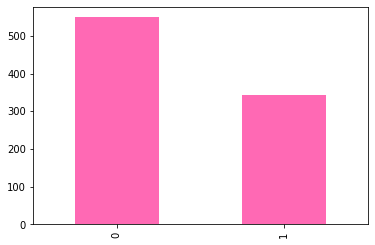

In [9]:
# Univariate Analysis - Target Variable

train.Survived.value_counts().plot(kind = "bar", color = "hotpink")

# Conclusion People died are more than Survived.

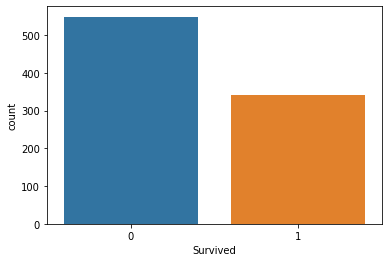

In [11]:
sns.countplot(train.Survived) # using Sns

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

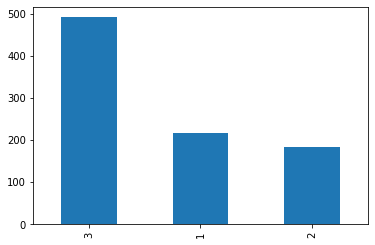

In [15]:
train.Pclass.value_counts().plot(kind = "bar")

# Class 03 count is higher and Class 02 is the lowest count.

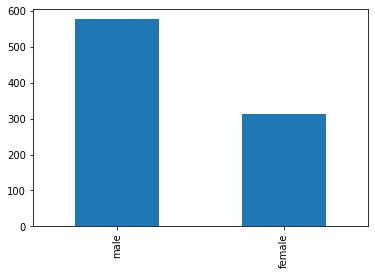

In [17]:
# Sex
train.Sex.value_counts().plot(kind = "bar")

# Conclusion: Males are higher than Females on Titanic.

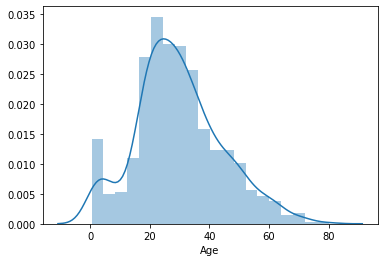

In [18]:
# Age - Histogram or Distplot
sns.distplot(train.Age) # Data appears to be quite normal

In [19]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

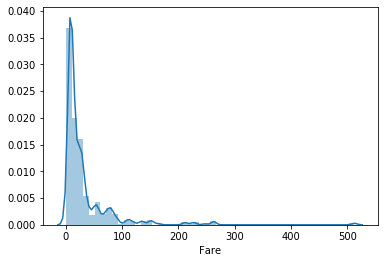

In [26]:
# Fare
sns.distplot(train.Fare)

In [27]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Feature Engineering - Sibsp + Parch

train["Family"] = train.SibSp + train.Parch + 1

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


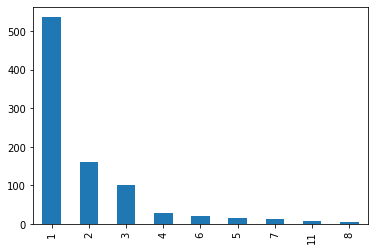

In [36]:
train.Family.value_counts().plot(kind = "bar")

In [37]:
train.Family.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [38]:
# Family_Cat - Singles - 1, Small Family - 02, Medium-03, 04 & >04: Large
def fam(x):
    if(x>=4):
        return('Large')
    elif(x==3):
        return("Medium")
    elif(x==2):
        return("Small")
    else:
        return("Singles")

In [41]:
train["Family_Cat"] = pd.Series(train.Family.apply(fam))

In [42]:
train.head() # Binning

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


In [43]:
pd.crosstab(train.Survived, train.Family_Cat)

# Large Families died where as Singles and Small Families Survived.

Family_Cat,Large,Medium,Singles,Small
Survived,,,,
0,60,43,374,72
1,31,59,163,89


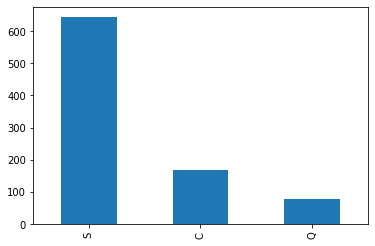

In [44]:
# Embarked
train.Embarked.value_counts().plot(kind = "bar")

# Lot of People boarded the ship from SouthHampton & Lowest Boarding No is from Queenstown.

### Summary of Univariate Analysis

* Fare is Skewed meaning people paid high fares as well. The Range is 0-512 where the Avg Fare is around 32.
* Age appears to be normal where Average Age is 29.6 and the Median age is 28.
* Lot of People boarded from **SouthHampton** and the leser count is observed from Queenstown.
* We created a New Variable(s) Family & Family_cat which we will use later to analyse in Bivariate.
* Hypothesis is Family Variable Survival is Dependent on the Frequency/Count - Chi Squares.
* More Males on Titanic in comparison to Females.
* Target Variable: People Survived are Less than the Ones who died.


### Bivariate Analysis

1. Num Vs Num

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


Text(0, 0.5, 'Fare')

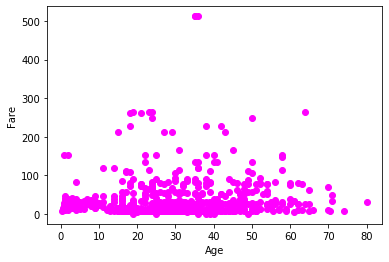

In [47]:
# Age Vs Fare Paid - Scatterplot

plt.scatter(train.Age, train.Fare, color = "magenta")
plt.xlabel("Age")
plt.ylabel("Fare")

# No Pattern in Age and Fare. Its random

In [53]:
# np.corrcoef(train.Age, train.Fare)

array([[nan, nan],
       [nan,  1.]])

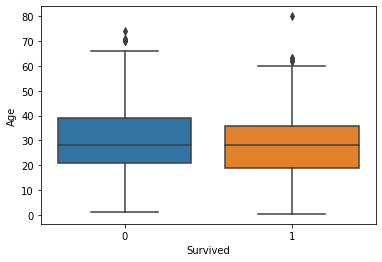

In [55]:
# Num Vs Cat - Survived vs Age

sns.boxplot(x = "Survived", y = "Age", data = train)

In [58]:
train.loc[train.Survived ==0, "Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [69]:
train.loc[train.Survived==1, "Age"].describe() # loc[row_index,col_index]

# Conclusion: Old Age People have survived where as the max age of people who did not is 74.

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


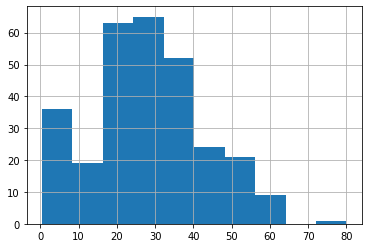

In [77]:
train.loc[train.Survived==1, "Age"].hist()

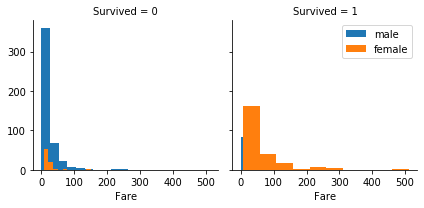

In [85]:
# Fare vs Survived - Facetgrid

g = sns.FacetGrid(train, col = 'Survived', hue = "Sex")
g.map(plt.hist, "Fare")
plt.legend()

In [74]:
train.loc[train.Survived==0, "Fare"].describe()

# Ho: People who paid high fare survived - Anova

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Singles
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Singles


In [88]:
# Ttest - Age vs Fare
train.Age.fillna(28, inplace = True)

In [90]:
train.Age.isnull().sum()

0

In [91]:
# Ho: Average Age & Fare are Same. There is no difference between these variables
# Ho: There is no relation between Age and Fare
# H1: H0 is False
stats.ttest_ind(train.Age, train.Fare)

# Ho is True meaning that the Age and Fare have nothing in common.


Ttest_indResult(statistic=-1.6517448796950809, pvalue=0.09876295124022455)

In [92]:
# Age Has Something to do with the Survived Class
# Ho: There is no effect of Age on Survival.
# H1: There is some effect of Age on Survival

# One is Cat and Another is Numerical ~ Anova

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [100]:
model = ols("Age~Survived+Embarked+Family_Cat", data = train).fit()
print(sm.stats.anova_lm(model))

               df         sum_sq      mean_sq          F        PR(>F)
Embarked      2.0     255.106730   127.553365   0.822401  4.397119e-01
Family_Cat    3.0   12091.318121  4030.439374  25.986292  4.107165e-16
Survived      1.0     580.864687   580.864687   3.745130  5.328099e-02
Residual    882.0  136797.028866   155.098672        NaN           NaN


* 4.397119e-01>0.05 # Embarked - No Effect on Age
* 4.107165e-16>0.05 # Family_Cat has some relation with the Age.
* 5.328099e-02>0.05 # Target Variable has nothing to do with Age

In [107]:
# Family_Cat vs Survived
# Ho: There is no effect of Family Category on Survived Class
# H1: There is effect of Large vs Small Families on Survived Class

teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(train.Family_Cat, train.Survived))
print(pvalue)

4.6082741465220125e-11


* Since PValue is less than 0.05, we can say that Family_Cat has an impact on the Survived Col.
* From a ML Point of View, the **Family_Cat, SibSp & Parch are an important variable(s) for the Modelling.**